Мы работаем в отделе анализа данных сети фитнесс-центров.
Нам поставлена задача по выявлению признаков, способствующих оттоку клиентов, и прогнозированию данного события на будущее. 
Для этого изучим данные анкет наших посетителей и разработаем рекомендации коллегам по удержанию клиентов.

Будем следовать следующем плану:
- [загрузим данные и изучим датасет](#1)
- [проведем исследовательский анализ данных](#2)
- [построим модель прогнозирования оттока клиентов](#3)
- [разобьем клиентов на кластеры](#4)
- [сформулируем выводы и рекомендации для коллег](#5)

## Загрузка и импорт данных
<a id='1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [3]:
df = pd.read_csv('C:\\Users\\Александр\Datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Библиотеки и данные загружены. Пропусков не наблюдаем; данные готовы к предобработке

## Предобработка и исследовательский анализ данных
<a id='2'></a>

Для удобства приведем названия столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

Изучим данные быстро и оперативно

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Из describe видим, что у некоторых признаков есть сильное расхождение между средним и медианой, у других - показатели практически равны. Нужна дополнительная информация. Быть может, имеет смысл посмотреть на разброс средних значений по сгруппированным (churn) данным

Хотелось бы обратить внимание на переменные Age и Avg_additional_charges_total. У них очень разные по величине стандартные отклонения. Это говорит о том, что переменные нужно стандартизировать перед обучением.

Если говорить о среднестатистическом клиенте, то он представляет из себя молодого тридцатилетнего человека (в равной пропорции М-Ж) с абонементом на текущий момент чуть больше 4 месяцев; который живет рядом. Он не обязательно пришел в рамках акции "приведи друга", но ходит на групповые занятия. На кросс-услуги тратит денег чуть больше медианного уровня. Стабильно ходит на занятия около 2 раз в неделю

In [7]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Тут наблюдаем аналогичную картину: по некоторым столбцам средние значения практически равны (gender, phone), а по некоторым видна ощутимая разница (contract_period, avg_additional_charges_total, lifetime, avg_class_frequency_current_month, avg_class_frequency_total). Возможно, псоледние как раз и оказывают существенное влияние на то, останется ли клиент с нами или уйдет

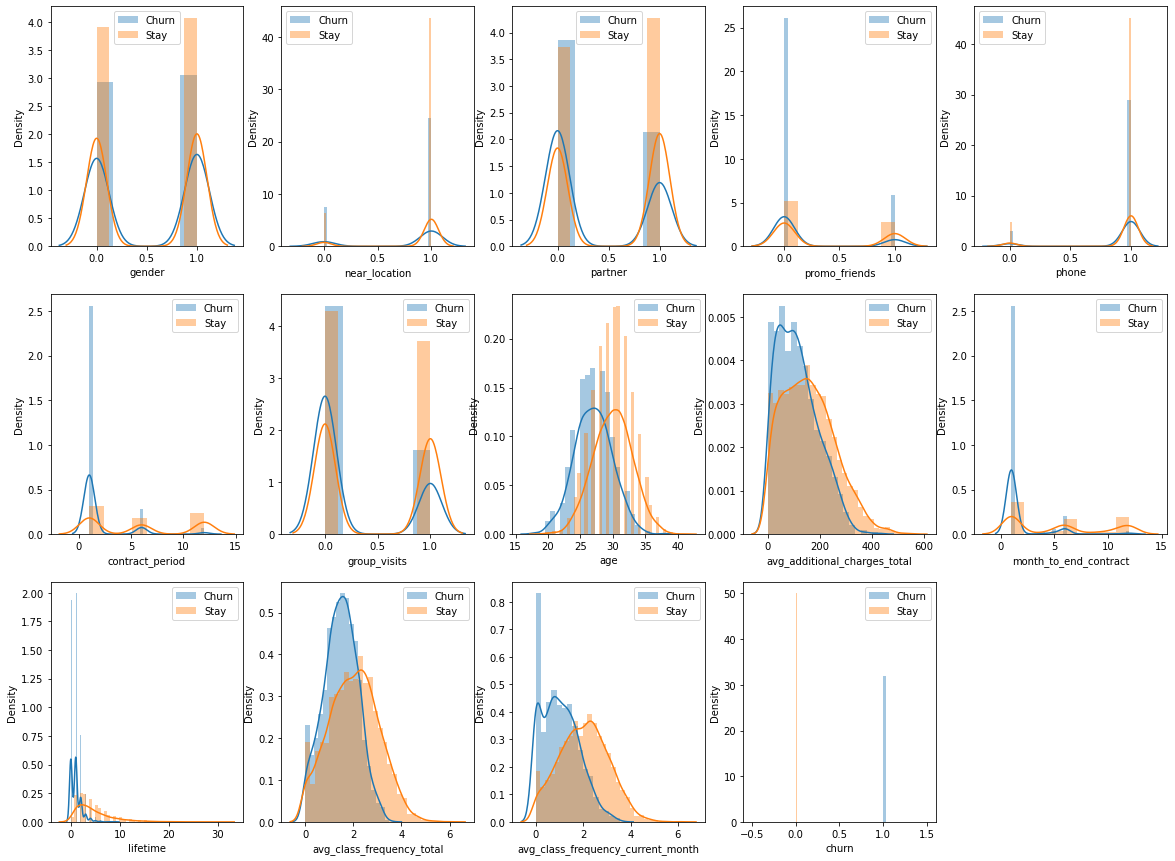

In [8]:
plt.subplots(figsize= (20,15))
num_cols = 5
num_rows = len(df.columns.values)//num_cols + 1
for i, col in enumerate (df.columns.values):
    sns.distplot(df.query('churn == 1')[col], label = 'Churn', ax = plt.subplot(num_rows, num_cols, i + 1))
    sns.distplot(df.query('churn == 0')[col], label = 'Stay')
    #plt.title(col)
    plt.legend()

И графиков можем сделать вывод, что ушедшим клиентам присущи следющие признаки:
- они скорее не являются сотрудником компании-партнёра нашего центра
- приобретают короткий абонемент
- вдвое реже ходят на групповые занятия
- в среднем на три года младше тех, кто остался (30 лет против 27)
- меньше пользуются допуслугами центра

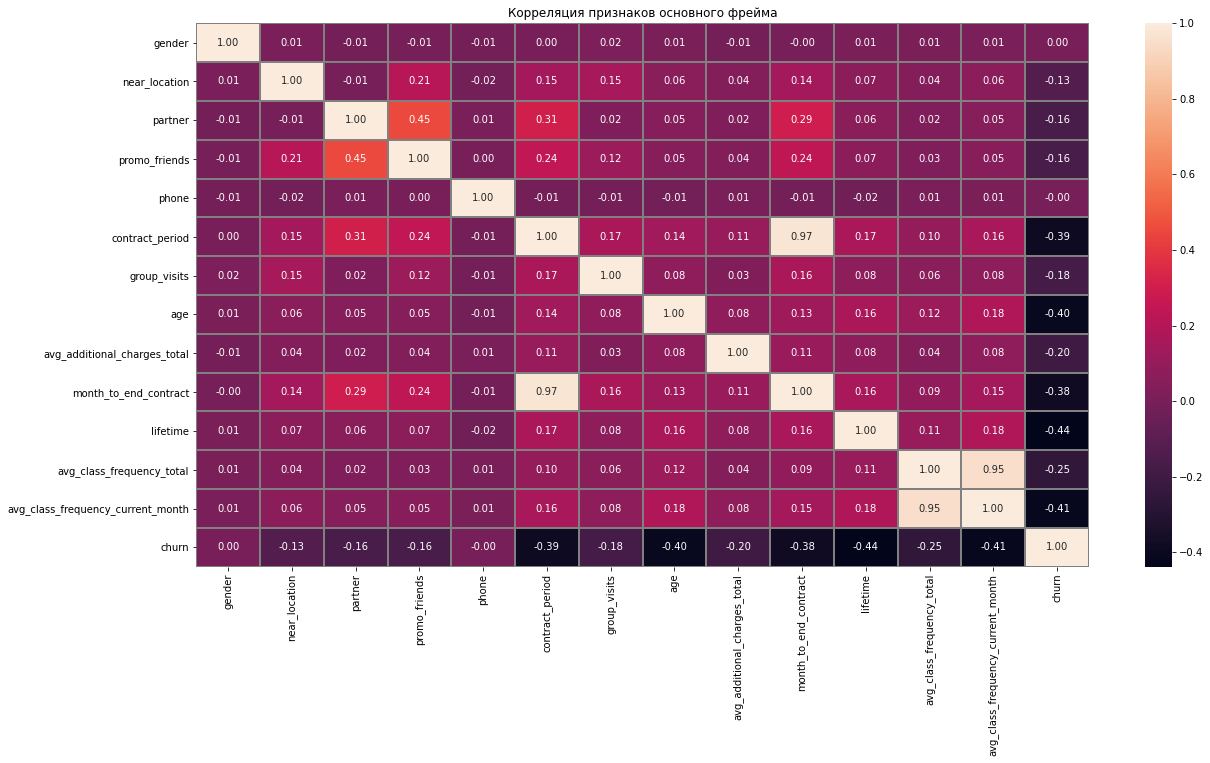

In [9]:
plt.figure(figsize=(20, 10))
plt.title('Корреляция признаков основного фрейма')
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

Из тепловой карты нельзя сделать однозначный вывод о том, что некоторые факторы СИЛЬНЕЙШИМ образом влияют на решение клиента уйти. Но те не менее, указанные выше показатели (contract_period, lifetime, avg_class_frequency_current_month) больше, чем другие, коррелируют с показателем оттока в обратную сторону. 

## Модель прогнозирования оттока клиентов
<a id='3'></a>

У нас есть все данные для того, чтобы спрогнозировать отток клиентов. Приступим

In [10]:
# разобьем датасет на признаки и переменную
X = df.drop('churn', axis = 1)
y = df['churn']

Также перед обучением модели нам стоит удалить по одному признаку из пары мультиколлинеарных (их мы можем видеть на тепловой карте выше). Избавимся от month_to_end_contract, avg_class_frequency_current_month

In [11]:
df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1, inplace = True)

In [12]:
# разобьем датасет на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
scaler = StandardScaler()
# обучим scaler на обучающей выборке
scaler.fit(X_train)
# стандартизируем обе выборки 
X_train_st = scaler.transform(X_train)  
X_test_st = scaler.transform(X_test)

In [14]:
# зададим алгоритм для новой модели на основе алгоритма линейной регрессии
lr_model = LogisticRegression(solver='liblinear', random_state=0) 

In [15]:
# обучим меодель
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
# рассчитаем прогноз класса и вероятность принадлежности к первому или второму классу
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

Напишем функцию, которая будет выводить интересующий нас метрики по нужным моделям

In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [18]:
print_all_metrics(y_test, lr_predictions, lr_probabilities, title='Метрики для модели логистической регрессии:')


Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98


In [19]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [20]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


Как видно из метрик, алгоритм логистической регрессии показывает чуть лучшие результаты: доля правильных ответов и кривая ошибок равны. Но точность, полнота и F1 у регресии чуть лучше.

## Кластеризация
<a id='4'></a>

In [21]:
#  стандартизируем данные
sc = StandardScaler()
# обучаем нормализатор и преобразуем набор данных 
X_sc = sc.fit_transform(df.drop(columns = ['churn'])) 
linked = linkage(X_sc, method = 'ward') 

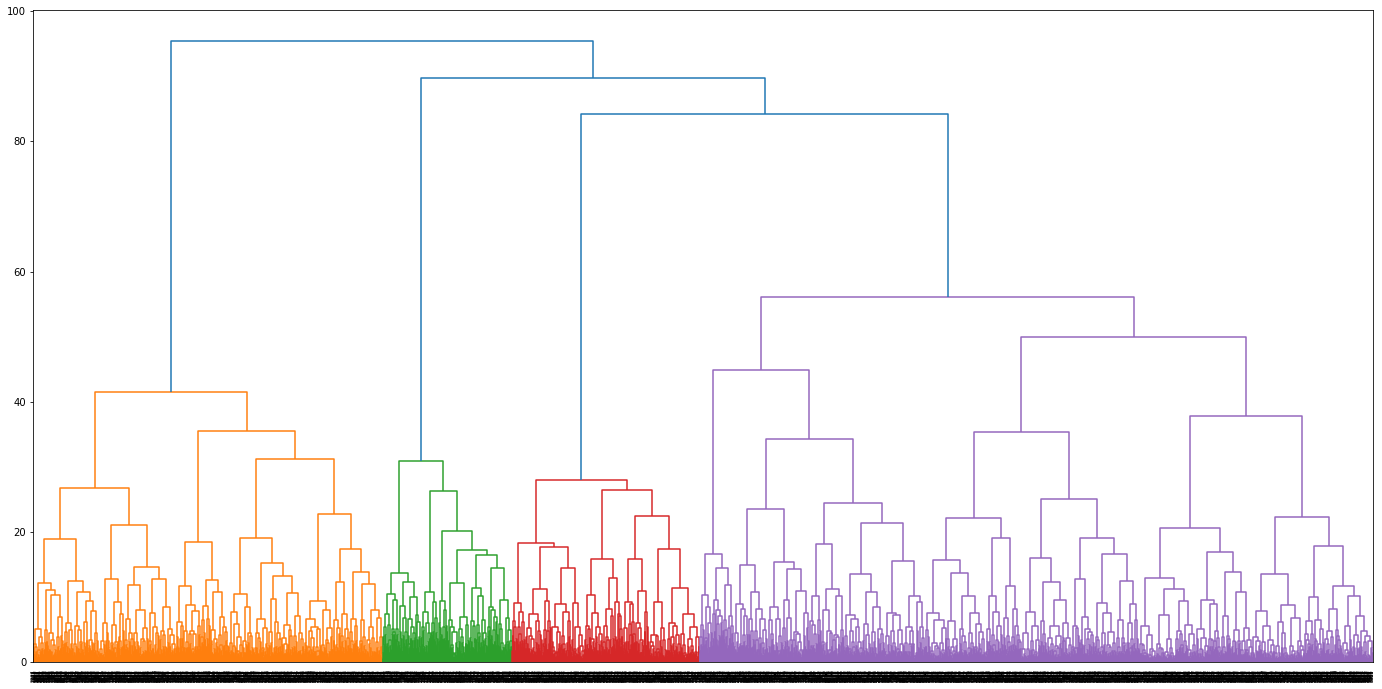

In [22]:
plt.figure(figsize=(24, 12))  
dendrogram(linked, orientation='top')
plt.show() 

Как видим, дендрограмма рисует нам 4 класса, на которые можно сгруппировать наших клиентов. Но по ощущениям, крайний кластер получаетяс очень большим. Поэтому можем его дополнительно разбить минимум на 2

In [23]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_sc)
df['cluster_km'] = labels


Глянем, в каких кластерах показателях оттока максимален и минимален

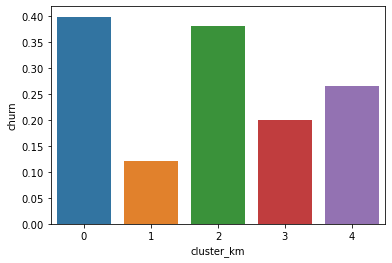

In [24]:
sns.barplot(data=df.groupby('cluster_km').mean().reset_index(), x='cluster_km', y='churn')
plt.show()

Первый кластер показывает минимальные показатели отттока: что же такого хорошего в нем + что общего плохого в 0 и 2? Посмотрим на распределения признаков и средние значения признаков в кластерах

In [25]:
# определим категориальные столбцы
df_cat = df[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']]

In [26]:
# определим непрерывные столбцы
df_cont = df[['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'cluster_km']]

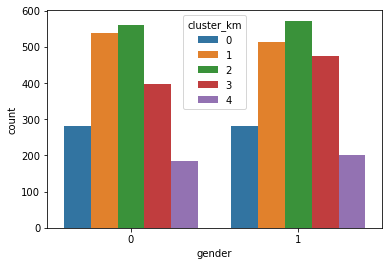

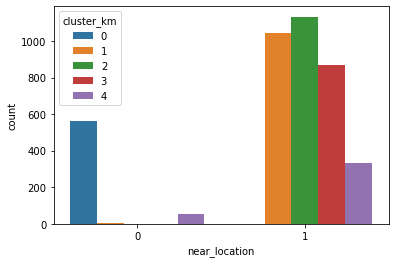

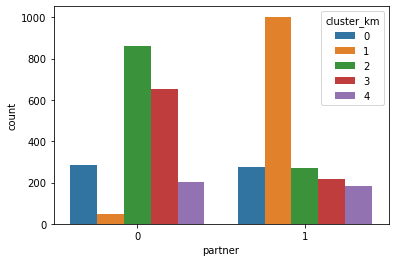

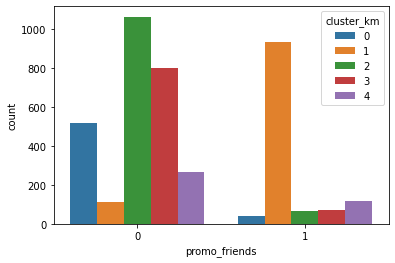

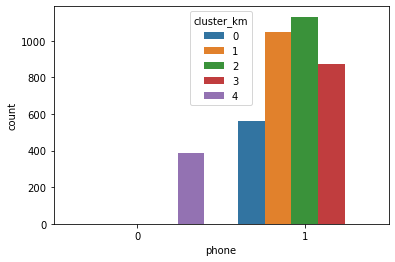

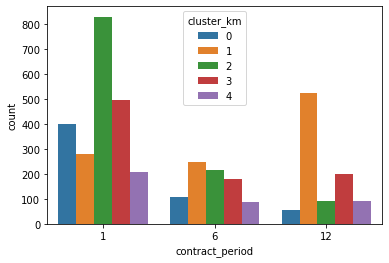

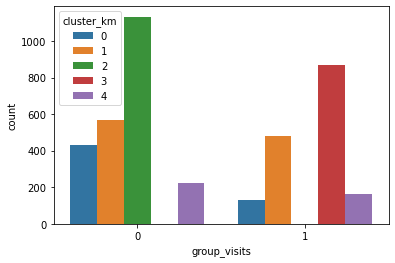

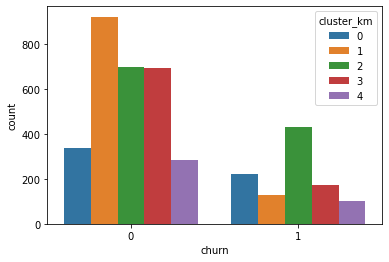

In [27]:
plt.subplots(figsize= (6,4))
for col in df_cat.columns:
    sns.countplot(data=df, x=col, hue='cluster_km')
    plt.show()

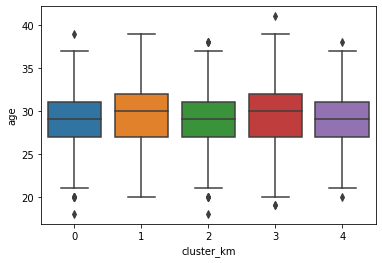

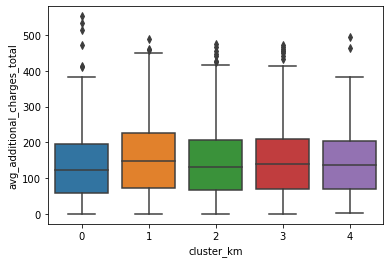

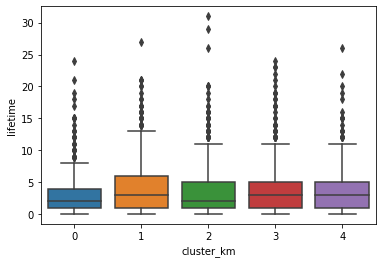

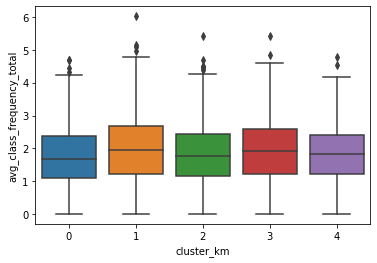

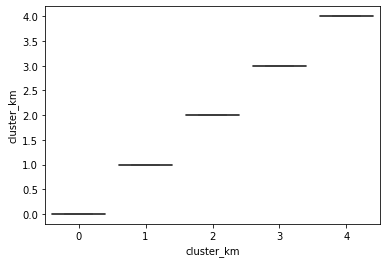

In [28]:
plt.subplots(figsize= (6,4))
for col in df_cont.columns:
    sns.boxplot(data=df_cont, x='cluster_km', y=col)
    plt.show()

In [29]:
df.groupby('cluster_km').mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Из таблицы и графиков делаем следующие выводы об обратном влиянии (выше признак - отток стремится к 0) на показатель оттока таких признаков, как:
- факт первоначальной записи в рамках акции «приведи друга» (promo_friends)
- клиент является сотрудником компании-партнёра клуба
- длительность абонемента (contract_period) и, соответственно, срок его окончания (month_to_end_contract) и lifetime
- факт посещения групповых занятий (group_visits)
- суммарная выручка от других услуг фитнес-центра (avg_additional_charges_total)
- средняя частота посещений в неделю (avg_class_frequency_total)

## Выводы и рекомендации
<a id='5'></a>

Исходя из проанализированных данных, можем предложить коллегам следующие активности:
- активнее использовать акцию "приведи друга" (с начислением бонусов за пришедшего друга)
- усиленно продвигать групповые занятия (обозначая выгоды, которые получит клиент)
- подробно выяснять привычки своих посетителей, чтобы с максимальной вероятностью им допродавать другие услуги (добавление в анкету нужных пунктов: их мы проанализируем и поймем, почему одни клиенты чаще пользуются кросс-услугами, и сможем им допродавать)
- активнее вести переговоры с компаниями из смежных сфер, чтобы привлекать в качестве клиентов их сотрудников: как показывает анализ, именно среди них доля оттока меньше всего 